In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df2 = pd.read_csv("bank-full.csv")

In [ ]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
a1 = pd.get_dummies(df2, drop_first = True)

In [ ]:
a1.shape[1]

43

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
X = a1.drop("y_yes",axis = 1) 
Y = a1["y_yes"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.7/dist-packages (0.8.0)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()
X_train_sm, Y_train_sm = oversample.fit_resample(X_train, Y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainsc = sc.fit_transform(X_train_sm)
X_testsc = sc.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_trainscm = scaler.fit_transform(X_train_sm)
X_testscm = scaler.transform(X_test)

In [ ]:
#Logistic regression

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [10, 1.0, 0.1]
max_iter = [100,1000,2500,5000]
grid = dict(solver=solvers,penalty=penalty,C=c_values,max_iter = max_iter)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,verbose = 1,cv = 5)
grid_result = grid_search.fit(X_trainsc, Y_train_sm)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.910338 using {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.910228 (0.102519) with: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.910213 (0.102511) with: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910228 (0.102519) with: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.910228 (0.102519) with: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
0.910213 (0.102511) with: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910228 (0.102519) with: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
0.910228 (0.102519) with: {'C': 10, 'max_iter': 2500, 'penalty': 'l2', 'solver': 'newton-cg'}
0.910213 (0.102511) with: {'C': 10, 'max_iter': 2500, 'penalty': 'l2', 'solver': 'lbfgs'}
0.910228 (0.102519) with: {'C': 10, 'max_iter': 2500, 'penalty': 'l2', 'solver': 'liblinear'}
0.910228 (0.102519) with: {'C': 10, 'max_iter': 5000, 'penalty': 'l2', 'solver':

In [ ]:
Y_pred = grid_search.predict(X_testsc)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
print("Test accuracy: ",accuracy_score(Y_test,Y_pred))
print("Recall: ", recall_score(Y_test,Y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test, Y_pred))
print("Classification report: \n",classification_report(Y_test, Y_pred))


Test accuracy:  0.8816764348114564
Recall:  0.46012832263978004
Confusion matrix: 
 [[7471  481]
 [ 589  502]]
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      7952
           1       0.51      0.46      0.48      1091

    accuracy                           0.88      9043
   macro avg       0.72      0.70      0.71      9043
weighted avg       0.88      0.88      0.88      9043



In [ ]:
from sklearn.metrics import f1_score


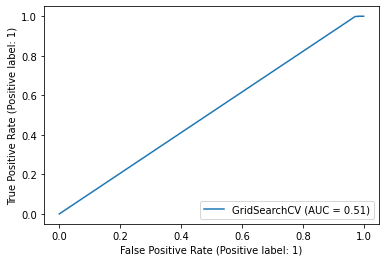

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(grid_search,X_test, Y_test)
plt.show()

In [ ]:
# Decision trees_model1

In [ ]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier(random_state=42)

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train_sm,Y_train_sm)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 4}
Best score is 0.8988583046606193


In [ ]:
Y_pred = tree_cv.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
print("Test accuracy: ",accuracy_score(Y_test,Y_pred))
print("Recall: ", recall_score(Y_test,Y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test, Y_pred))
print("Classification report: \n",classification_report(Y_test, Y_pred))

Test accuracy:  0.8647572708172067
Recall:  0.458295142071494
Confusion matrix: 
 [[7320  632]
 [ 591  500]]
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      7952
           1       0.44      0.46      0.45      1091

    accuracy                           0.86      9043
   macro avg       0.68      0.69      0.69      9043
weighted avg       0.87      0.86      0.87      9043



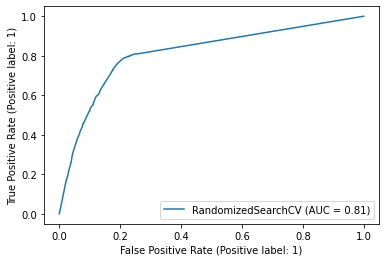

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(tree_cv,X_test, Y_test)
plt.show()

In [ ]:
#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [2,4, 6, 8],
               'min_samples_split': [1,3,5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier(random_state = 13)
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_sm,Y_train_sm)



Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.92030028 0.9176259  0.92005005 0.92005005 0.9220832         nan
 0.92094151 0.92005005 0.91975289        nan]
  category=UserWarning


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=13),
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [1, 3, 5, 7, 10],
                                        'n_estimators': [20]},
                   random_state=101, verbose=1)

In [ ]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(model.best_params_))
print("Best score is {}".format(model.best_score_))

Tuned Decision Tree Parameters: {'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'criterion': 'entropy'}
Best score is 0.9220832030028151


In [ ]:
Y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
print("Test accuracy: ",accuracy_score(Y_test,Y_pred))
print("Recall: ", recall_score(Y_test,Y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test, Y_pred))
print("Classification report: \n",classification_report(Y_test, Y_pred))

Test accuracy:  0.8943934534999447
Recall:  0.5261228230980751
Confusion matrix: 
 [[7514  438]
 [ 517  574]]
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7952
           1       0.57      0.53      0.55      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.74      0.74      9043
weighted avg       0.89      0.89      0.89      9043



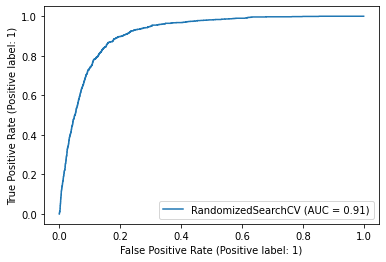

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(model,X_test, Y_test)
plt.show()

In [ ]:
#SVM Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
# Let create parameter grid for GridSearchCV
parameters = {  'C':[0.01, 1, 5],
                'kernel':('linear', 'rbf'),
                'gamma' :('scale', 'auto')
             }
gsc = GridSearchCV(estimator = svm.SVC(), param_grid= parameters,cv= 5,n_jobs=-1, verbose =1)

# Fitting the model for grid search. It will first find the best parameter combination using cross validation. 
# Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), 
# to built a single new model using the best parameter setting.
gsc.fit(X_trainscm, Y_train_sm) 


Fitting 5 folds for each of 12 candidates, totalling 60 fits


KeyboardInterrupt: ignored

In [ ]:
print(f'Best hyperparameters: {gsc.best_params_}') 
print(f'Best score: {gsc.best_score_}')
print('Detailed GridSearchCV result is as below')
gsc_result = pd.DataFrame(gsc.cv_results_).sort_values('mean_test_score',ascending= False)
gsc_result[['param_C','param_kernel','param_gamma','mean_test_score']]

In [ ]:
Y_pred = gsc.predict(X_testscm)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
print("Test accuracy: ",accuracy_score(Y_test,Y_pred))
print("Recall: ", recall_score(Y_test,Y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test, Y_pred))
print("Classification report: \n",classification_report(Y_test, Y_pred))

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(gsc,X_test, Y_test)
plt.show()

In [ ]:
# Gradient Boosting classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
param_grid = {
              'n_estimators' : [25, 50 ,75, 100, 200],
              'learning_rate': [0.005 ,0.05, 0.5, 1.5],
              'max_depth': [2, 4, 6, 8],
              'max_features': [10, 12, 17] 
              }
grid_gb_clf = GridSearchCV(gb_clf, param_grid, cv=5, scoring="accuracy", n_jobs= -1, verbose = 1)
grid_gb_clf.fit(X_trainscm,Y_train)

#Y_pred = grid_gb_clf.predict(X_testscm)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


KeyboardInterrupt: ignored

In [ ]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(grid_gb_clf.best_params_))
print("Best score is {}".format(grid_gb_clf.best_score_))

Tuned Decision Tree Parameters: {'learning_rate': 0.05, 'max_depth': 6, 'max_features': 12, 'n_estimators': 200}
Best score is 0.9090080327543699


In [ ]:
Y_pred = grid_gb_clf.predict(X_testscm)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
print("Test accuracy: ",accuracy_score(Y_test,Y_pred))
print("Recall: ", recall_score(Y_test,Y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test, Y_pred))
print("Classification report: \n",classification_report(Y_test, Y_pred))

Test accuracy:  0.9074422205020458
Recall:  0.47296058661778184
Confusion matrix: 
 [[7690  262]
 [ 575  516]]
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7952
           1       0.66      0.47      0.55      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.72      0.75      9043
weighted avg       0.90      0.91      0.90      9043



In [ ]:
#XGboost

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
param_tuning = {"learning_rate"    : [0.10, 0.15, 0.20] ,"max_depth": [ 3, 4, 5], "min_child_weight" : [ 1, 3, 5],
               "gamma": [ 0.0, 0.1, 0.2],
               "colsample_bytree" : [0.5 , 0.7, 1] }

xgb_model = XGBClassifier()

gsearch = GridSearchCV(estimator = xgb_model,param_grid = param_tuning,#scoring = 'neg_mean_absolute_error', #MAE#scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

gsearch.fit(X_trainscm,Y_train_sm)
#return gsearch.best_params_
gsearch.predict(X_testscm)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(gsearch.best_params_))
print("Best score is {}".format(gsearch.best_score_))

Tuned Decision Tree Parameters: {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1}
Best score is 0.9146543634657492


In [ ]:
Y_pred = gsearch.predict(X_testscm)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
print("Test accuracy: ",accuracy_score(Y_test,Y_pred))
print("Recall: ", recall_score(Y_test,Y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test, Y_pred))
print("Classification report: \n",classification_report(Y_test, Y_pred))


Test accuracy:  0.8919606325334513
Recall:  0.6040329972502292
Confusion matrix: 
 [[7407  545]
 [ 432  659]]
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      7952
           1       0.55      0.60      0.57      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.77      0.76      9043
weighted avg       0.90      0.89      0.89      9043



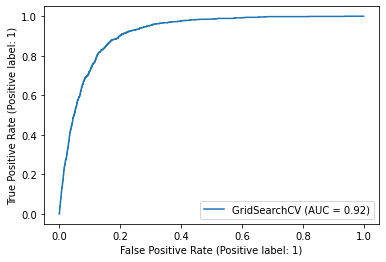

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(gsearch,X_testscm, Y_test)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

SGDmodel = SGDClassifier(max_iter=10000)
clfmodel = GridSearchCV(SGDmodel, param_grid=params, cv = 5, n_jobs = -1,verbose = 1)
clfmodel.fit(X_trainsc,Y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 15.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=10000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'log', 'squared_hinge',
                                  'modified_huber'],
                         'pe

In [ ]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(clfmodel.best_params_))
print("Best score is {}".format(clfmodel.best_score_))

Tuned Decision Tree Parameters: {'alpha': 0.001, 'loss': 'log', 'penalty': 'none'}
Best score is 0.9019575899344083


In [ ]:
Y_pred = clfmodel.predict(X_testsc)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
print("Test accuracy: ",accuracy_score(Y_test,Y_pred))
print("Recall: ", recall_score(Y_test,Y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test, Y_pred))
print("Classification report: \n",classification_report(Y_test, Y_pred))

Test accuracy:  0.899037929890523
Recall:  0.3538038496791934
Confusion matrix: 
 [[7744  208]
 [ 705  386]]
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.65      0.35      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043



In [ ]:
from sklearn.ensemble import VotingClassifier
models = [('logistic',model),('XGBOOST',xgb_model),('random',clf)]
ensemble= VotingClassifier(estimators=models,voting='hard',weights=[1,5,5])

In [ ]:
ensemble.fit(X_trainscm,Y_train_sm)
Y_pred = ensemble.predict(X_testscm)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.92033156 0.9176259  0.92005005 0.92005005 0.9220832         nan
 0.92081639 0.92005005 0.91976853        nan]
  category=UserWarning


#

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
print("Test accuracy: ",accuracy_score(Y_test,Y_pred))
print("Recall: ", recall_score(Y_test,Y_pred))
print("Confusion matrix: \n",confusion_matrix(Y_test, Y_pred))
print("Classification report: \n",classification_report(Y_test, Y_pred))

Test accuracy:  0.8992590954329316
Recall:  0.5673693858845096
Confusion matrix: 
 [[7513  439]
 [ 472  619]]
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7952
           1       0.59      0.57      0.58      1091

    accuracy                           0.90      9043
   macro avg       0.76      0.76      0.76      9043
weighted avg       0.90      0.90      0.90      9043

